# Full example

In [1]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot
using LinearAlgebra
using Arpack
using Statistics
using Optim
using NCDatasets
using FTPClient

┌ Info: Recompiling stale cache file C:\Users\jmbeckers\.julia\compiled\v1.2\DINEOF.ji for DINEOF [top-level]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file C:\Users\jmbeckers\.julia\compiled\v1.2\PyPlot\oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240
┌ Info: Precompiling FTPClient [01fcc997-4f28-56b8-8a06-30002c134abb]
└ @ Base loading.jl:1242


## Get a nice data cube and look at it

In [2]:
fname="c:/Users/JMBECKERS/Desktop/bidon.nc"
download("https://data.nodc.noaa.gov/pathfinder/Version5.2/2000/20000101020232-NODC-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.2_NOAA14_G_2000001_night-v02.0-fv01.0.nc",fname)

"c:/Users/JMBECKERS/Desktop/bidon.nc"

In [3]:
ds=Dataset(fname)
tem=ds["sea_surface_temperature"][:]
tem[ismissing.(tem)].=NaN

35961928-element view(reshape(::Array{Union{Missing, Float64},3}, 37324800), [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  37324791, 37324792, 37324793, 37324794, 37324795, 37324796, 37324797, 37324798, 37324799, 37324800]) with eltype Union{Missing, Float64}:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

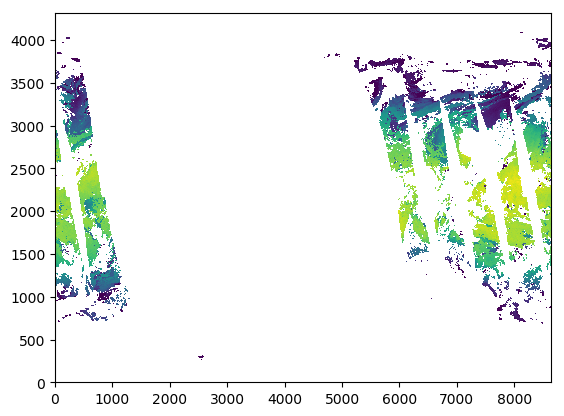

PyObject <matplotlib.collections.PolyCollection object at 0x000000010A86A6D8>

In [4]:
pcolor(tem[:,:,1]')

In [18]:
# Via ftp

ftp=FTP(hostname="ftp.nodc.noaa.gov")

URL:       ftp://ftp.nodc.noaa.gov/
Transfer:  passive mode
Security:  none

In [19]:
cd(ftp, "pub/data.nodc/pathfinder/Version5.3/L3C/2019/data")

In [20]:
readdir(ftp)

546-element Array{String,1}:
 "20190101023149-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2019001_night-v02.0-fv01.0.nc"
 "20190101135221-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2019001_day-v02.0-fv01.0.nc"  
 "20190102022001-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2019002_night-v02.0-fv01.0.nc"
 "20190102230658-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2019002_day-v02.0-fv01.0.nc"  
 "20190103025915-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2019003_night-v02.0-fv01.0.nc"
 "20190103141913-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2019003_day-v02.0-fv01.0.nc"  
 "20190104024727-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2019004_night-v02.0-fv01.0.nc"
 "20190104140726-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2019004_day-v02.0-fv01.0.nc"  
 "20190105051435-NCEI-L3C_GHRSST-SSTskin-AVHRR_Pathfinder-PFV5.3_NOAA19_G_2019005_night-v02.0-fv01.0.nc"
 "20190105135539-NCEI-L3C_

## Make a first analysis with only a limited number of EOFs

## Decide which directions to collapse and make a full analysis

## Apply QC and take out suspect points (put NaN)

## Redo the decomposition but by restarting

## Look at error field

## Fuse the original data and the reconstruction to look at the effect